**Importing libraries**

In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
data.shape

(26707, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
data.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
round(data['h1n1_vaccine'].value_counts(normalize = True)*100,2)

0    78.75
1    21.25
Name: h1n1_vaccine, dtype: float64

The data is unbalanced.

**Feature Selection**
- Missing value Treatment

In [8]:
def missing_plot(data):
    """
    Docstring
    ---------
    Shows the count of missing values for each features in bars.
    
    Parameters
    ----------
        data (Series or DataFrame):

        Data for which missing values should be found.
    
    Returns
    -------
        barplot:

        The barplot with missing values.
    """
    plt.figure(figsize = (15,5))
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(ascending = False, inplace = True)
    plt.xlabel('Features')
    plt.ylabel('Number of missing values')
    plt.ylim(0,len(data))
    plt.title('Number of missing values by feature.')
    missing.plot(kind = 'bar')
    plt.show()

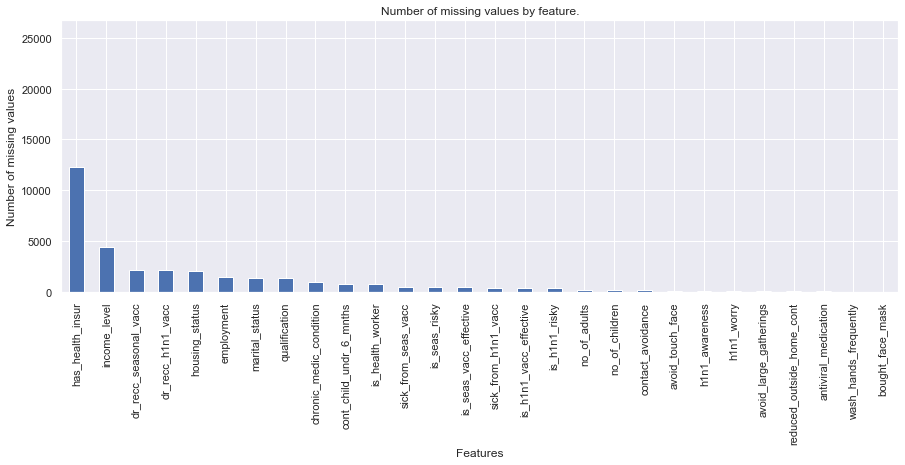

In [9]:
missing_plot(data)

In [10]:
# Dropping features with more than 30% of missing values
missing = data.isnull().sum()
missing = list(missing[missing > (len(data)*(3/10))].index)
data.drop(columns = missing, inplace = True)

In [11]:
def value_count(data,x,nan):
    """
    Docstring
    ---------
    Returns the count of each categories in percentage.
    
    Parameters
    ----------
        data (Series or Dataframe):

        The data used to find value_counts.

        x (Series):

        The specific column for which the value_counts should be found.

        nan (bool):

        If True the null values will also be considered 
    
    Returns
    -------
        Dataframe:

        The dataframe contaning the value counts of specified column in percentage.
    """
    return pd.DataFrame(round(data[x].value_counts(normalize = True, dropna = not nan)*100,2))

In [12]:
# Income level
value_count(data,x = 'income_level', nan = True)

,income_level
"<= $75,000, Above Poverty",47.84
"> $75,000",25.50
NaN,16.56
Below Poverty,10.10


16% of income_level contains null values

In [13]:
# Filling missing values by -1 for easy analysis
data['income_level'].fillna(value = -1, inplace = True)

<AxesSubplot:xlabel='employment', ylabel='count'>

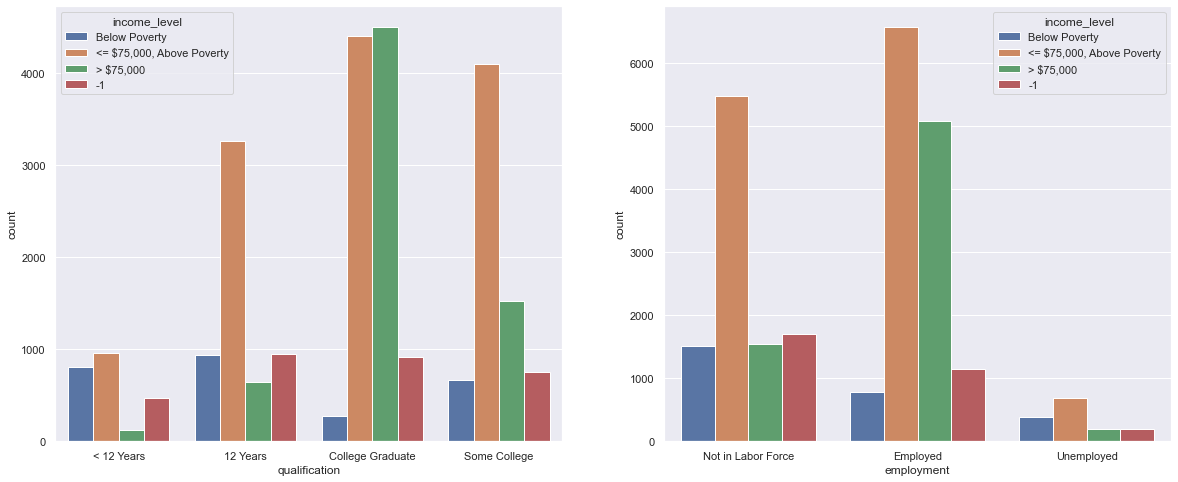

In [14]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
sns.countplot(data = data, x = 'qualification', hue = 'income_level', ax = ax1)
sns.countplot(data = data, x = 'employment', hue = 'income_level', ax = ax2)

- Income level of a person is most likely to be depend on thier qualification and employment status:
- The missing values of income_level are equally distibuted incase of qualification.
- Comparing with employment most of the nan values are employed or not part of labor force.
- This increases the chance of them being classified as people who are above poverty.

In [15]:
# Imputing with the mode value
data['income_level'] = data['income_level'].map(lambda x: data['income_level'].mode().values[0] if x == -1 else x)

In [16]:
# dr_recc_seasonal_vacc
value_count(data = data, x = 'dr_recc_seasonal_vacc', nan = True)

,dr_recc_seasonal_vacc
0.0,61.61
1.0,30.31
NaN,8.09


8% of dr_recc_seasonal_vacc contains null values

In [17]:
# Filling missing values by -1 for easy analysis
data['dr_recc_seasonal_vacc'].fillna(value = -1, inplace = True)

# Imputing with the mode value
data['dr_recc_seasonal_vacc'] = data['dr_recc_seasonal_vacc'].map(lambda x: data['dr_recc_seasonal_vacc'].mode().values[0] if x == -1 else x)

In [26]:
# Filling rest of the columns with mode values as each column is categorical and has only less than 10% of missing values.
data.fillna(data.mode().iloc[0], inplace = True)

In [28]:
# Removing id column as it is unique for each record and does not contribute to model building
data.drop(columns = 'unique_id', inplace = True)

- Type Casting

In [30]:
# Since every column is categorical, we have to change the datatype for each column as object
data = data.astype('object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   h1n1_worry                 26707 non-null  object
 1   h1n1_awareness             26707 non-null  object
 2   antiviral_medication       26707 non-null  object
 3   contact_avoidance          26707 non-null  object
 4   bought_face_mask           26707 non-null  object
 5   wash_hands_frequently      26707 non-null  object
 6   avoid_large_gatherings     26707 non-null  object
 7   reduced_outside_home_cont  26707 non-null  object
 8   avoid_touch_face           26707 non-null  object
 9   dr_recc_h1n1_vacc          26707 non-null  object
 10  dr_recc_seasonal_vacc      26707 non-null  object
 11  chronic_medic_condition    26707 non-null  object
 12  cont_child_undr_6_mnths    26707 non-null  object
 13  is_health_worker           26707 non-null  object
 14  is_h1n

**Train Test Split**

In [47]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 123, stratify = y) # Since data is unbalanced

In [67]:
x_train.shape

(18694, 31)

In [68]:
x_test.shape

(8013, 31)

In [69]:
y_train.shape

(18694,)

In [70]:
y_test.shape

(8013,)

**Encoding Categorical Variables**

In [71]:
encoder = OneHotEncoder()
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

In [72]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [73]:
# Reshaping into a 2D array for sklearn models
y_train_reshaped = y_train_encoded.reshape(-1,1)
y_test_reshaped = y_test_encoded.reshape(-1,1)

**Logistic Regression**

In [74]:
model = LogisticRegression()
model.fit(x_train_encoded,y_train_reshaped)

LogisticRegression()

In [75]:
y_pred = model.predict(x_test_encoded)

In [82]:
print(classification_report(y_test_reshaped,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6311
           1       0.68      0.41      0.51      1702

    accuracy                           0.83      8013
   macro avg       0.77      0.68      0.71      8013
weighted avg       0.82      0.83      0.82      8013



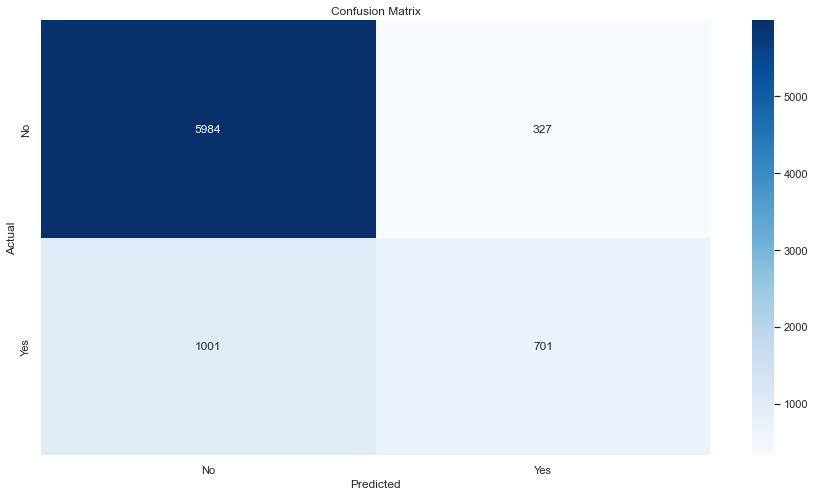

In [95]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8))
sns.heatmap(confusion_matrix(y_test_reshaped,y_pred),cmap = 'Blues', annot = True, fmt = 'g', ax = ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Actual')
ax.set_yticklabels(['No','Yes'])
plt.show()

In [92]:
print(f'Precision score Training : {precision_score(y_train_reshaped,model.predict(x_train_encoded)):1.2f}')
print(f'Precision score Testing : {precision_score(y_test_reshaped,model.predict(x_test_encoded)):1.2f}')

print('\n')

print(f'Recall score Training : {recall_score(y_train_reshaped,model.predict(x_train_encoded)):1.2f}')
print(f'Recall score Testing : {recall_score(y_test_reshaped,model.predict(x_test_encoded)):1.2f}')

print('\n')

print(f'F1 score Training : {f1_score(y_train_reshaped,model.predict(x_train_encoded)):1.2f}')
print(f'F1 score Testing : {f1_score(y_test_reshaped,model.predict(x_test_encoded)):1.2f}')

Precision score Training : 0.69
Precision score Testing : 0.68


Recall score Training : 0.43
Recall score Testing : 0.41


F1 score Training : 0.53
F1 score Testing : 0.51


In [107]:
fpr,tpr,threshold = roc_curve(y_test_reshaped,y_pred, drop_intermediate = False)
print(f'ROC_AUC score : {roc_auc_score(y_test_reshaped,y_pred)}')

ROC_AUC score : 0.680027048812055


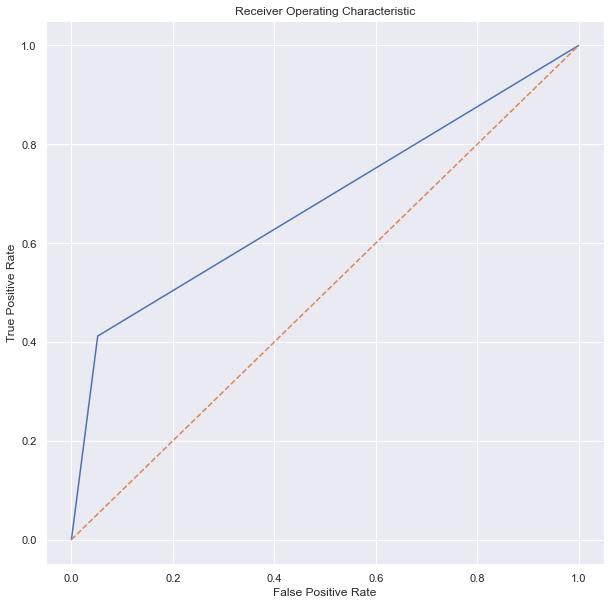

In [108]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()